In [22]:
from annoy import AnnoyIndex
exec(open("../database.py").read())
exec(open("../helperFunctions.py").read())
import numpy as np
from keras.datasets import mnist
from time import perf_counter
from ast import literal_eval

In [23]:
datasetImages, datasetLabels = readMnist()

***Create Annoy Index***

In [28]:
def createIndex(indexMethod, datasetImages):
    f = datasetImages.shape[1] # Length of item vector that will be indexed
    t = indexMethod(f, 'euclidean')
    time_start = perf_counter()
    for i in range(datasetImages.shape[0]):
        t.add_item(i, datasetImages[i])
    t.build(10) # 10 trees
    time_end = perf_counter()
    totalTime = (time_end - time_start)
    print(f'Took {totalTime:.3f} seconds')
    return (t, totalTime)
(indexedStruct, time) = createIndex(AnnoyIndex, datasetImages)

Took 6.997 seconds


In [29]:
# (min, max) = createIndexNumerous(createIndex, AnnoyIndex, datasetImages, 10)
# print('min : ', min, '\n','max : ', max,)

In [30]:
indexedStruct.save('first.ann')

True

***Basic operations on annoy index***

In [31]:
u = AnnoyIndex(datasetImages.shape[1], 'euclidean')
u.load('first.ann') # super fast, will just mmap the file

True

In [32]:
indexes = []
distances = []
def measureTime(par, indexes, distances):
    totalTime = 0
    for i in range(par) : 
        time_start = perf_counter()
        (index, distance) = u.get_nns_by_item(i, 100, include_distances=True)
        time_end = perf_counter()
        totalTime += (time_end - time_start)
        indexes.append(index)
        distances.append(distance)
    # report the duration
    print(f'Took {totalTime:.3f} seconds')
    return np.round(totalTime, 3)
measureTime(1000, indexes, distances)

Took 1.594 seconds


1.594

In [33]:
# (min, max) = measureTimeNumerous(measureTime, 10)
# print('min : ', min, '\n','max : ', max,)

In [34]:
indexes = np.array(indexes)
distances = np.round(np.array(distances).astype(float), 4)

In [35]:
print('indexes : ', indexes.shape, '\n', 'distances : ', distances.shape,)

indexes :  (1000, 100) 
 distances :  (1000, 100)


In [36]:
(trueIndexes, trueDistances) = readDB()

In [38]:
compareFirstTen(indexes, distances, trueIndexes, trueDistances)

0 || 0
0.0 || 0.0
30483 || 32248
1596.7095 || 1561.4724
63470 || 8728
1600.8738 || 1591.6014
65325 || 18932
1603.479 || 1594.7191
24149 || 30483
1604.4469 || 1596.7095
52295 || 63470
1605.7092 || 1600.8738
26251 || 65325
1609.6943 || 1603.479
50173 || 24149
1613.7047 || 1604.4469
63952 || 42338
1627.4609 || 1604.8876
67351 || 52295
1650.3839 || 1605.7092


In [39]:
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances)
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances, 1.01)
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances, 1.1)

0.1957
0.4841
0.9896


In [40]:
print(indexes[0]) # will find the 100 nearest neighbors

[    0 30483 63470 65325 24149 52295 26251 50173 63952 67351 24330 53428
 18123 62832 10536 20034 52057 33825 22477 64902 19825  1634 27378 15378
 34474 46824 60857 69428 29021 24107 69298 39031  1978 21976 36697 25675
 11396 52540 44263 65632 63754  5210 59212 22963  6516   832 35838 21210
 52559 62558 65021 46698 50187 67393  4622 50301 66548 23225 50071 45567
 43031 26313  2395 11936 66177 29023 68741 67484 62586 66823 68924 25557
 67435 67388 29649 21543  3005 14543 15415 40432 22542 33607 26383  9652
 21563 67304  4443 60645 18949 54131  2037 48541 25720 36695 32001 60491
 55453 60674 15482   771]


index :  0 
distance :  0.0
index :  30483 
distance :  1596.7095
index :  63470 
distance :  1600.8738
index :  65325 
distance :  1603.479
index :  24149 
distance :  1604.4469
index :  52295 
distance :  1605.7092
index :  26251 
distance :  1609.6943
index :  50173 
distance :  1613.7047
index :  63952 
distance :  1627.4609
index :  67351 
distance :  1650.3839


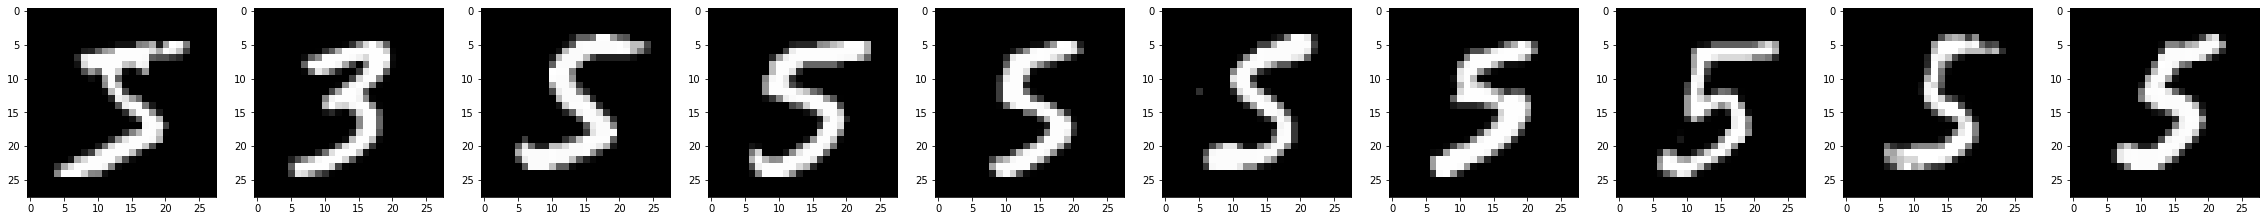

In [41]:
draw_mnist(indexes, distances, datasetImages)